# Understanding PROJ.4 and EPSG Codes

Lesson objectives:
* Understand how to read a PROJ4 string
* Understand how a PROJ4 string relates to an EPSG code
* Visually explore changing PROJ4 string parameters

Steven Chao, v1

## Introduction


A coordinate reference system tells Python where and how to place coordinates on Earth's surface.

https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf

As you may recall, a coordinate reference system can either be a geographic coordinate system or a projected coordinate system (also known as a map projection). A geographic coordinate system consists of a datum, which consists of an ellipsoid model and how this ellipsoid is aligned with the geoid. It's spherical in nature, and units are typically angular (latitude and longitude). A projected coordinate system is created by taking a geographic coordinate system and using math to transformg a 3-D surface onto a flat, 2-D surface. Units are typically linear and are oftentimes measured in meters.

https://mgimond.github.io/Spatial/chp09-0.html
https://www.esri.com/arcgis-blog/products/arcgis-pro/mapping/coordinate-systems-difference/
https://automating-gis-processes.github.io/CSC18/lessons/L2/projections.html
https://autogis-site.readthedocs.io/en/stable/notebooks/L2/projections.html

All map projections introduce error because they are inherently imperfect. The "best" or "perfect" projection to use is highly dependent on what needs to mapped and where. Therefore, as you can expect, there are many projections to choose from.

https://autogis-site.readthedocs.io/en/stable/notebooks/L2/projections.html

In this chapter, we will explore the check, utilize, change, and create CRS's in Python. To provide examples along the way, we will use a shapefile of the Washington, DC, boundary, downloaded from Open Data DC (https://opendata.dc.gov/datasets/washington-dc-boundary).

Let's begin by reading in this dataset (make sure you have it downloaded and un-zipped on your computer).

In [1]:
# Import module
import geopandas as gpd

# Set filepath to folder containing shapefile
dc_shapefile_filepath = r"/Washington_DC_Boundary"

# Read data
dc = gpd.read_file(dc_shapefile_filepath)

DriverError: /Washington_DC_Boundary: No such file or directory

Let's also define a function that will allow us to quickly produce a map of our data.

In [2]:
# Import module
import matplotlib.pyplot as plt

def map_data(data, header):
    '''Function superimposes all the data on a map and sets a title for the map.'''    
    
    # Create subplots
    #fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize = (10, 5))
    
    # Set colors
    colors = ["#a3ddcb", "#03506f"]
    
    # Iterate through list of data and colors to superimpose them onto map
    for i in range(0, len(data)):
        data[i].plot(facecolor = colors[i], ax = ax)
    
    # Add title
    plt.title(header)

    # Remove empty white space around the plot
    plt.tight_layout()

Now, we can see how the shapefile we just read in looks like.

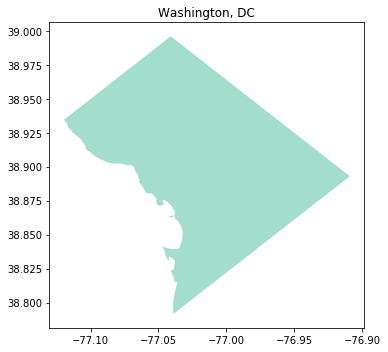

In [3]:
# Create map using DC shapefile
map_data([dc], "Washington, DC")

Looks like Washington, DC, albeit a bit lopsided! Now let's see how we can work with CRS's in Python.

## Checking and Setting Coordinate Reference Systems in Python

### Checking a dataset's coordinate reference system

To check the dataset's CRS (assuming it has one), use the .crs attribute.

In [4]:
# Get CRS for DC shapefile
print(dc.crs)

{'init': 'epsg:4326'}


The output is a dictionary with a value of 'epsg:4326.' We'll cover what this means in more detail later in this chapter, but just know for now that an EPSG code is a way to reference a CRS.

### Change a dataset's CRS

To change a dataset's CRS, we'll need to reproject the data. Here we will project copies of our data twice, once with a `PROJ.4` string and once with a `EPSG` code. The projection will remain in latitude and longitude but we will change the ellipsoid and datum. 

In [5]:
# Example 1: Create a copy of the DC shapefile
dc_reproject_proj4 = dc.copy()

# Example 1: Reproject the data
dc_reproject_proj4 = dc_reproject_proj4.to_crs("+proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs")

# Example 2: Create a copy of the DC shapefile
dc_reproject_epsg = dc.copy()

# Example 2: Reproject the data
dc_reproject_epsg = dc_reproject_epsg.to_crs(epsg=4269)

As seen in these examples, we can pass various values into the to_crs() function. The first example passed a `PROJ.4` string value, and the second example passed an `EPSG` code. These values both reference the same CRS (in this case, NAD83)--they are simply just different ways to reference it. There are some other formats we can pass as values, but we'll cover proj4proj4`proj4` string and `epsg` in this chapter.

When we call the .crs attribute, it's no longer 'epsg:4326,' which means that the data has been reprojected! 

In [6]:
# Example 1: Print new CRS of DC
print("Example 1: ", dc_reproject_proj4.crs)

# Example 2: Print new CRS of DC
print("Example 2: ", dc_reproject_epsg.crs)

Example 1:  +proj=longlat +ellps=GRS80 +datum=NAD83 +no_defs
Example 2:  {'init': 'epsg:4269', 'no_defs': True}


## PROJ.4 String

"PROJ.4 strings are a compact way to identify a spatial or coordinate reference system. Using the `PROJ.4` syntax, you specify the complete set of parameters including the ellipse, datum, projection units and projection definition that define a particular CRS."

(https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/)

### What is in a PROJ.4 string?

"Notice that the crs information is structured using a string of characters and numbers that are combined using + signs. The CRS for your data are in the proj4 format. The string contains all of the individual CRS elements that Python or another GIS might need. Each element is specified with a + sign, similar to how a .csv file is delimited or broken up by a ,. After each + we see the CRS element being defined. For example +proj= and +datum=."

(https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/)



"Below is a list of PROJ parameters which can be applied to most coordinate system definitions. This table does not attempt to describe the parameters particular to particular projection types. These can be found on the pages documenting the individual projections."

* +a: Semimajor radius of the ellipsoid axis
* +axis: Axis orientation
* +b: Semiminor radius of the ellipsoid axis
* +ellps: Ellipsoid name (see proj -le)
* +k: Scaling factor (deprecated)
* +k_0: Scaling factor
* +lat_0: Latitude of origin
* +lon_0: Central meridian
* +lon_wrap: Center longitude to use for wrapping (see below)
* +over: Allow longitude output outside -180 to 180 range, disables wrapping (see below)
* +pm: Alternate prime meridian (typically a city name, see below)
* +proj: Projection name (see proj -l)
* +units: meters, US survey feet, etc.
* +vunits: vertical units.
* +x_0: False easting
* +y_0: False northing

https://proj.org/usage/projections.html

Be sure to always verify the parameters that are allowed for each projection. You can't always "mix and match" the above parameters when creating a custom projection.

### Creating a custom CRS using PROJ.4 string

We can change the parameters to create a custom CRS that suits our specific needs. In this section, we will create a CRS tailored to our DC shapefile.

Below are the original and re-projected map of DC from above--these will serve as a reference point for comparison.

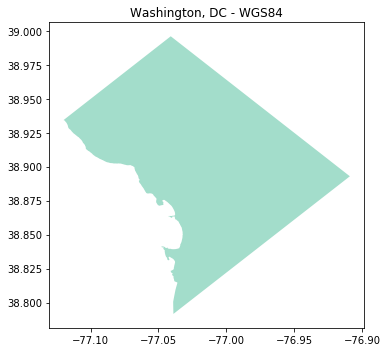

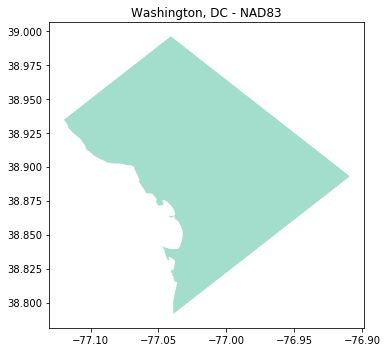

In [7]:
# Map original DC shapefile
map_data([dc], "Washington, DC - WGS84")

# Map reprojected DC shapefile
# map_data([dc_reproject_proj4], "Washington, DC - NAD83")

The two maps above utilize a geographic coordinate system, as evidenced by the latitude and longitude values on the axes. Another way to check is to look at the geometry of the shapefiles.

In [8]:
# Check geometry values of original shapefile
print(dc['geometry'].head())

# Check geometry values of reprojected shapefile
# print(dc_reproject_proj4['geometry'].head())

0    POLYGON ((-77.1197952245159 38.93435090401753,...
Name: geometry, dtype: object
0    POLYGON ((-77.1197952245159 38.93435090401753,...
Name: geometry, dtype: object


Looks like latitude and longitude coordinates! Now, we will reproject the shapefile using a projected coordinate system.

0    POLYGON ((1106986.81379205 4694966.591875904, ...
Name: geometry, dtype: object


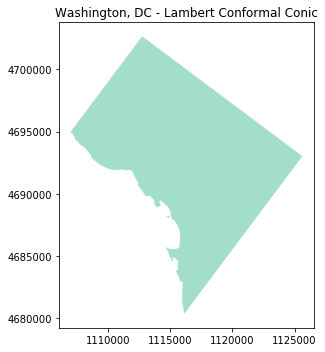

In [9]:
# Create a copy of the DC shapefile
dc_lcc = dc.copy()

# Reproject the data
# https://proj.org/operations/projections/lcc.html#parameters
dc_lcc = dc_lcc.to_crs("+proj=lcc +lon_0=-90 +lat_1=33 +lat_2=45 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc], "Washington, DC - Lambert Conformal Conic")

# Check geometry values
print(dc_lcc['geometry'].head())

Here, we used the Lambert Conformal Conic projection. Notice how the values on the axes changed from latitude and longitude to meters. Also notice how the DC appears to be "tilted" to the left when compared to DC in the previous CRS's. That's because the center of this projection is at the 90th meridian west (`+lon_0=-90`; negative is used to denote West) and the Equator (`+lat_0=0`; 0 is the default value when not specified in the PROJ.4 string)

We can change the values for lat_0 and lon_0, which refer to the latitude of origin and the central meridian, respectively. We will change those values to 38.9072 and -77.0369, which is the center of DC.

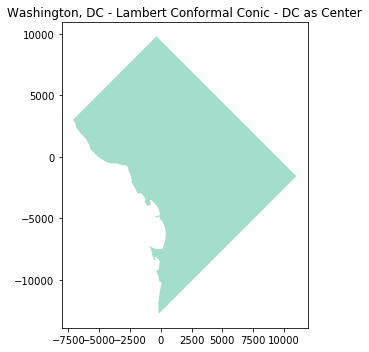

In [10]:
# Create a copy of the DC shapefile
dc_lcc_center = dc.copy()

# Reproject the data
# https://proj.org/operations/projections/lcc.html#parameters
dc_lcc_center = dc_lcc_center.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=33 +lat_2=45 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_center], "Washington, DC - Lambert Conformal Conic - DC as Center")

As seen in the new graph above, the values on both axes have changed. The origin (0, 0) is now in the center of DC.

The PROJ.4 string for this projection has two additional parameters lat_1 and lat_2, which specify the first and second parallel respectively. Recall that a conic projection "intersects" a globe at what is termed the standard parallels.

https://proj.org/operations/projections/lcc.html

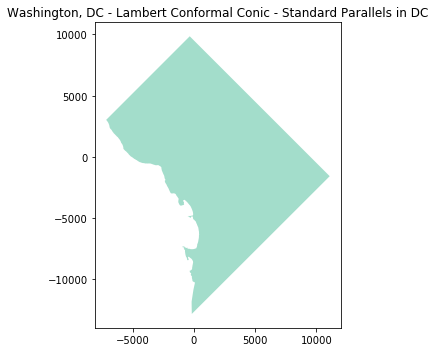

In [11]:
# Create a copy of the DC shapefile
dc_lcc_parallels_1 = dc.copy()

# Reproject the data
# https://proj.org/operations/projections/lcc.html#parameters
dc_lcc_parallels_1 = dc_lcc_parallels_1.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=38.850 +lat_2=39.950 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_parallels_1], "Washington, DC - Lambert Conformal Conic - Standard Parallels in DC")

Two standard parallels at 38.850 N andd 39.950 N were chosen as they fall within the DC boundaries. Nothing really appears to be different; however, these values are important. Look what happens when we assign different values, ones that don't really make sense for mapping in DC, and compare the resulting DC map to the previous map.

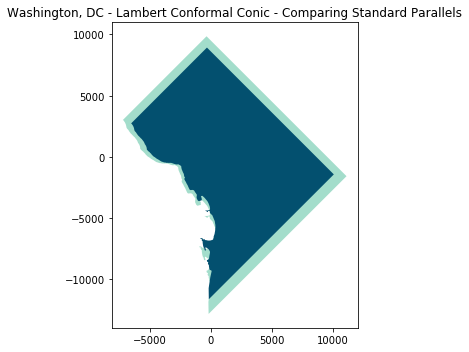

In [12]:
# Create a copy of the DC shapefile
dc_lcc_parallels_2 = dc.copy()

# Reproject the data
# https://proj.org/operations/projections/lcc.html#parameters
dc_lcc_parallels_2 = dc_lcc_parallels_1.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=10 +lat_2=60 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_parallels_1, dc_lcc_parallels_2], "Washington, DC - Lambert Conformal Conic - Comparing Standard Parallels")

It appears DC has shrunk! Of course, that's not actually the case in reality, but because map projections are inherently imperfect, choosing arbitrary parameters can make things worse. In this case, because the chosen standard parallels are relatively far from each other and from DC, all the data in between the standard parallels end up being compressed even more. For more information, visit https://giscourses.cfans.umn.edu/sites/giscourses.cfans.umn.edu/files/understanding_map_projections.pdf.

Finally, two other parameters we can change are +x_0 and +y_0, which are false easting and false northing respectively. The values assigned to these parameters simply offset the axes by that associated value; they do not change or affect the projection. False easting (with a value of 500,000) is used in Universal Tranverse Mercator (UTM) projections so that negative coordinates are avoided to the west of the central meridian in each zone. Similarly, false northing (with a value of 10,000,000 m) is also used to avoid negative coordinates when a UTM zone is in the southern hemisphere.

http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Map%20coordinate%20systems/UTM%20and%20UPS.htm

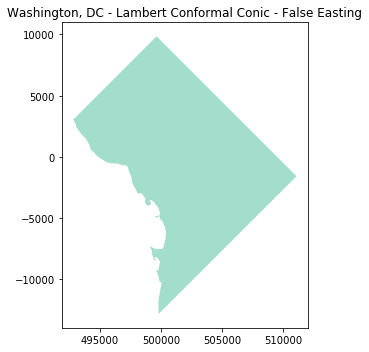

In [13]:
# Create a copy of the DC shapefile
dc_lcc_false_e = dc.copy()

# Reproject the data
# https://proj.org/operations/projections/lcc.html#parameters
dc_lcc_false_e = dc_lcc_false_e.to_crs("+proj=lcc +lat_0=38.9072 +lon_0=-77.0369 +lat_1=38.850 +lat_2=39.950 +x_0=500000 +y_0=0 +ellps=GRS80")

# Map reprojected DC shapefile
map_data([dc_lcc_false_e], "Washington, DC - Lambert Conformal Conic - False Easting")

Notice that the x-axis shifted to the left by 500,000 units. The y-axis stayed the same because we did not use false northing. Now, the "origin" is (500000, 0).

UTM is conformal. So let's compare our custom projection to UTM Zone 18N (in which DC falls).

https://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/universal-transverse-mercator.htm

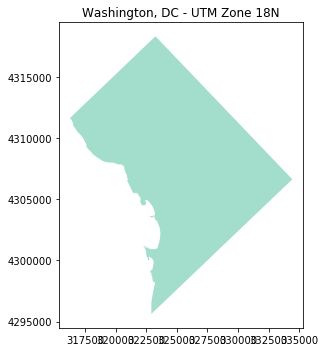

In [14]:
# Create a copy of the DC shapefile
dc_utm18n = dc.copy()

# Reproject the data
# https://www.spatialreference.org/ref/epsg/wgs-84-utm-zone-18n/
dc_utm18n = dc_utm18n.to_crs("+proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Map reprojected DC shapefile
map_data([dc_utm18n], "Washington, DC - UTM Zone 18N")

Looks pretty much the same!

## EPSG Codes

Many CRS's are assigned and can be referenced by an EPSG code, which consists of a four or five digit number. EPSG stands for the European Petroleum Survey Group, a now-defunct organization that compiled this CRS dataset. EPSG codes can be further explored at http://www.epsg-registry.org/ or https://spatialreference.org/ref/epsg/

https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/

### Obtaining EPSG Code from PROJ.4 String

Not all CRS's have a corresponding EPSG code, but we can find the EPSG code (if it exists) given a PROJ.4 string. To do so, we can use the to_espg() function in the pyproj module.

https://geopandas.org/docs/user_guide/projections.html

In [15]:
# Import module
import pyproj

def get_epsg(proj4_string, min_confidence = 70):
    '''Function takes a PROJ.4 string and optional minimum confidence level as an input and outputs the relevant EPSG code, if one exists. Source: https://geopandas.org/docs/user_guide/projections.html'''
    
    # Get relevant EPSG at the specified minimum confidence level
    return pyproj.CRS(proj4_string).to_epsg(min_confidence = min_confidence)


# Call function to obtain relevant EPSG code
# https://www.spatialreference.org/ref/epsg/26943/
result = get_epsg("+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +x_0=2000000 +y_0=500000 +ellps=GRS80 +datum=NAD83 +units=m +no_defs")

# Print result
print(result)

26943


In the example above, we were able to successfully obtain the EPSG code (in this case, NAD83 / California zone 3) because it is exactly matched to the PROJ.4 string. If we're missing some information in the PROJ.4 string, however, we might not be able to get an exact EPSG code match.

In [16]:
# Call function to obtain relevant EPSG code
result_missing = get_epsg("+proj=lcc +lat_1=38.43333333333333 +lat_0=36.5 +lon_0=-120.5 +ellps=GRS80 +datum=NAD83 +units=m +no_defs")

# Print result
print(result_missing)

None


We can lower the min_confidence parameter value in the to_epsg() function, which will cause the function to return an EPSG code that is the closest match to the provided PROJ.4 string.

https://geopandas.org/docs/user_guide/projections.html

In [17]:
# Call function to obtain relevant EPSG code and lower the minimum confidence value
result_lower_confidence = get_epsg("+proj=lcc +lat_1=38.43333333333333 +lat_2=37.06666666666667 +lat_0=36.5 +lon_0=-120.5 +ellps=GRS80 +datum=NAD83 +units=m +no_defs", min_confidence = 20)

# Print result
print(result_lower_confidence)

26943


To get the PROJ.4 string from an EPSG code, we can use the rasterio module: https://rasterio.readthedocs.io/en/latest/api/rasterio.crs.html.